In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Algerian_forest_fires_CLEANED_DATASET.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
# drop day, month, year 
df.drop(['day','month','year'], axis=1, errors= 'ignore', inplace= True)

In [5]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
# Encoding Classes Feature 
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [7]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [8]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [9]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
# Independent and Dependent Feature

X = df.drop(['FWI'], axis =1 ) # Independent 
y = df['FWI'] # Dependent

In [11]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [13]:
# Train Test Split 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [14]:
# Featuer Selection based on Correlation 
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

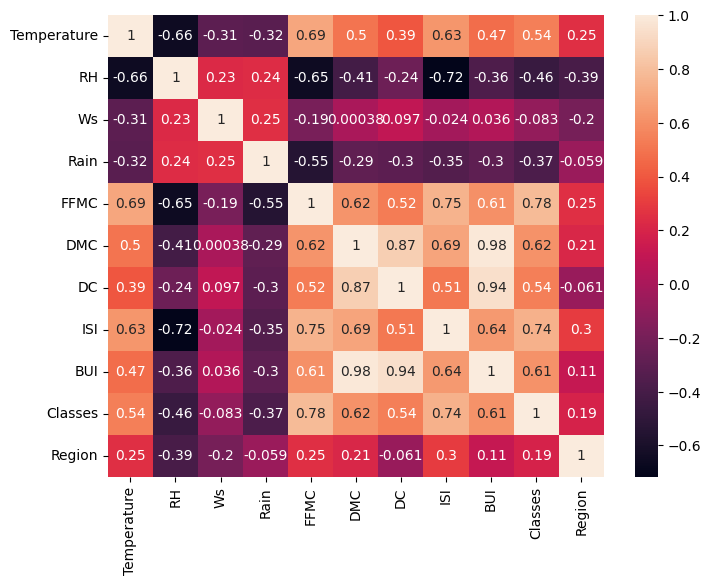

In [15]:
# Check for multicollinearity 
plt.figure(figsize=(8,6))
sns.heatmap(X_train.corr(), annot = True)

In [16]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [18]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True, errors='ignore')
X_test.drop(corr_features,axis=1,inplace=True, errors='ignore')
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature Scaling Or Standardization

In [19]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

## Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

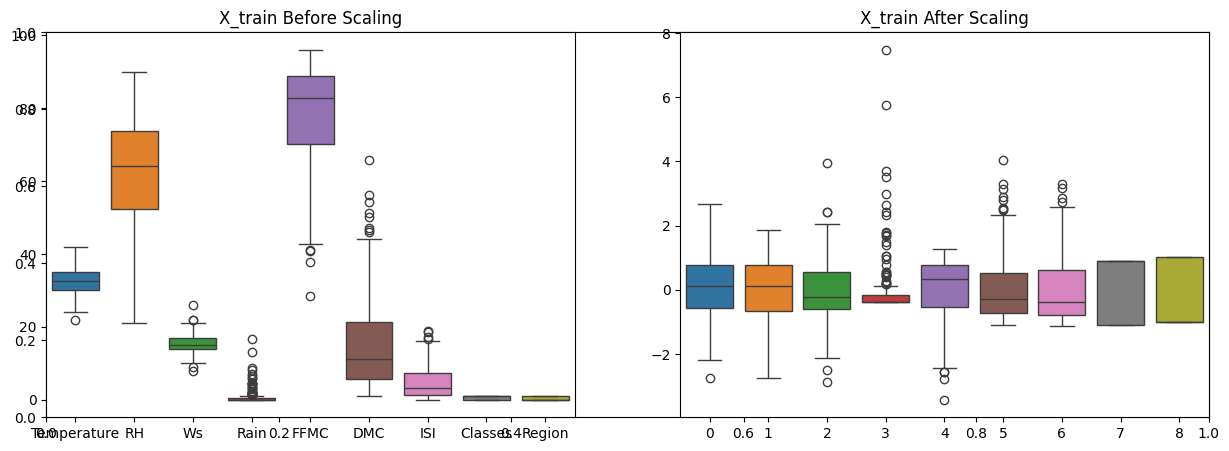

In [21]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model 

In [22]:
from sklearn.linear_model import LinearRegression

li = LinearRegression()
li.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
# print coff and intersection 
print("Coefficient = ", li.coef_)
print("Intercept = ", li.intercept_)

Coefficient =  [-0.03634495 -0.17441065  0.00703214 -0.04108155 -0.82319823  3.6982583
  4.84057298  0.40422124 -0.39259928]
Intercept =  7.156043956043957


In [24]:
# Prediction 
y_pred = li.predict(X_test_scaled)
y_pred

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

In [25]:
# Performance Matrics  
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, y_pred)

In [26]:
# R2 score 
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [27]:
print("MAE = ", mae)
print("Score = ", score)

MAE =  0.5468236465249979
Score =  0.9847657384266952


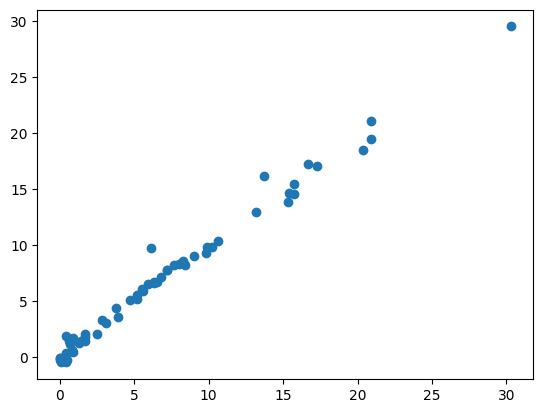

In [28]:
# Scatter 
plt.scatter(y_test, y_pred)

## Lasso Regression 

Mean absolute error 1.1331759949144087
R2 Score 0.9492020263112388


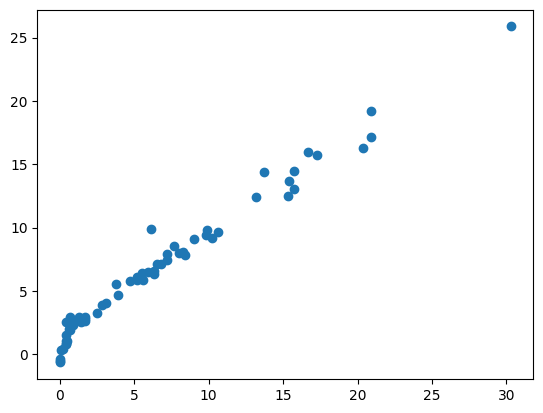

In [29]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Cross Validation Lasso

In [30]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [31]:
lassocv.predict(X_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [32]:
print(lassocv.alpha_)

0.05725391318234408


In [33]:
print(lassocv.alphas_)

[7.05853002 6.58280872 6.13914944 5.72539132 5.33951911 4.97965339
 4.64404142 4.33104857 4.03915039 3.76692517 3.51304702 3.27627941
 3.05546914 2.84954075 2.65749124 2.47838523 2.31135036 2.15557308
 2.01029467 1.87480753 1.74845178 1.63061198 1.52071419 1.41822315
 1.32263965 1.23349817 1.15036452 1.0728338  1.00052839 0.93309613
 0.87020857 0.81155943 0.75686304 0.705853   0.65828087 0.61391494
 0.57253913 0.53395191 0.49796534 0.46440414 0.43310486 0.40391504
 0.37669252 0.3513047  0.32762794 0.30554691 0.28495408 0.26574912
 0.24783852 0.23113504 0.21555731 0.20102947 0.18748075 0.17484518
 0.1630612  0.15207142 0.14182231 0.13226397 0.12334982 0.11503645
 0.10728338 0.10005284 0.09330961 0.08702086 0.08115594 0.0756863
 0.0705853  0.06582809 0.06139149 0.05725391 0.05339519 0.04979653
 0.04644041 0.04331049 0.0403915  0.03766925 0.03513047 0.03276279
 0.03055469 0.02849541 0.02657491 0.02478385 0.0231135  0.02155573
 0.02010295 0.01874808 0.01748452 0.01630612 0.01520714 0.01418

mae = 0.6199701158263434
score = 0.9820946715928275


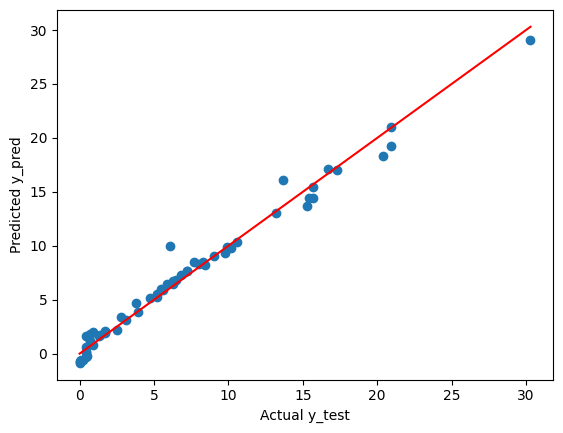

In [34]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()], color = 'red'
)
plt.xlabel("Actual y_test")
plt.ylabel("Predicted y_pred")
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)

print("mae =", mae)
print("score =", score)

## Ridge Regression 

Mean absolute error 0.564230534010569
R2 Score 0.9842993364555513


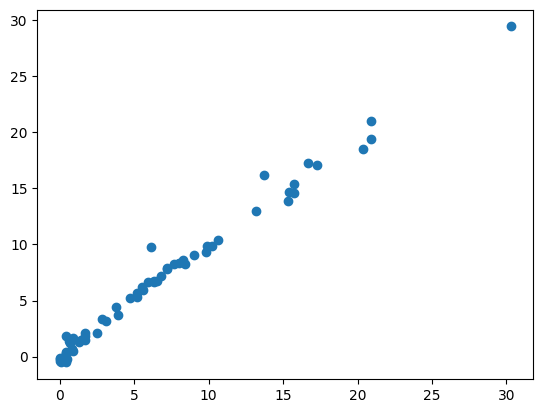

In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Ridge CV

In [36]:
from sklearn.linear_model import RidgeCV 
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled,y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [37]:
print(ridgecv.alpha_)

1.0


Mean absolute error 0.564230534010569
R2 Score 0.9842993364555513


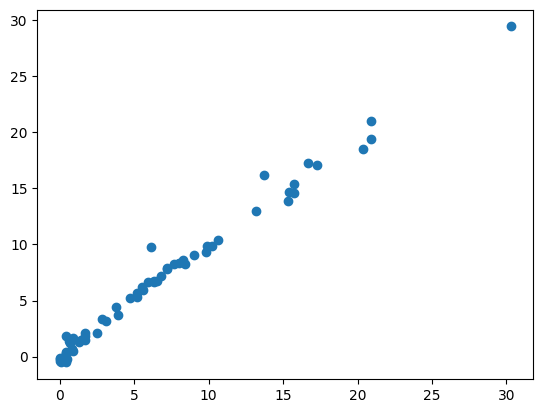

In [38]:
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

## Elasticnet Regression

Mean absolute error 1.8822353634896
R2 Score 0.8753460589519703


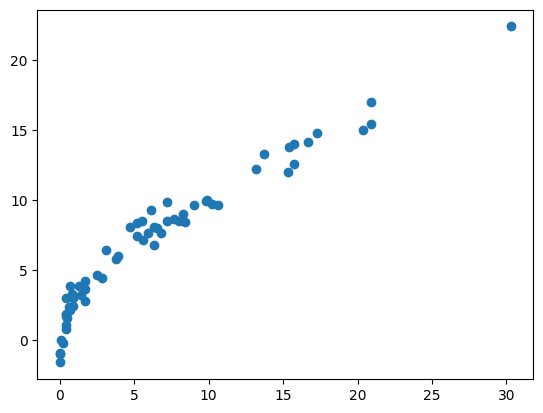

In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Elasticnet CV

Mean absolute error 0.6575946731430902
R2 Score 0.9814217587854941


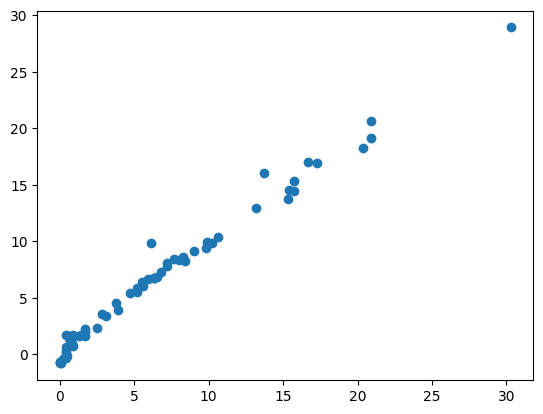

In [40]:
from sklearn.linear_model import ElasticNetCV 
el = ElasticNetCV(cv = 5)
el.fit(X_train_scaled,y_train)

y_pred = el.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [42]:
# Pickle the machine learning model and preprocessing model StandardScaler
scaler

,copy,True
,with_mean,True
,with_std,True


In [46]:
ridge # it has the better accuracy from all of the models

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [48]:
import pickle 
pickle.dump(scaler, open("scaler.pkl","wb"))
pickle.dump(ridge, open("ridge.pkl","wb"))